# Loss Functions
Here we will discuss the most common loss functions used in machine learning and deep learning models. For both regression and classification problems, we will discuss the loss functions and their use cases.

## Regression Loss Functions

## Mean Squared Error (MSE)
::: {.callout-note title="MSE Mean Squared Error"}
Mean Squared Error (MSE) is the most common loss function used in regression problems. It calculates the average of the squares of the errors or deviations. The error is the difference between the actual value and the predicted value. The formula for MSE is:
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$



#### Derivative of MSE
$$
\hat{y} = W \cdot x + \beta 
$$
$$
LOSS = \frac{1}{n} \sum_{i=1}^{n} (y_i - (W \cdot x_i + \beta))^2 \\
\frac{\delta LOSS}{\delta W} = \frac{1}{n} \sum_{i=1}^{n} -2x_i(y_i - (W \cdot x_i + \beta)) \\
\frac{\delta LOSS}{\delta \beta} = \frac{1}{n} \sum_{i=1}^{n} -2(y_i - (W \cdot x_i + \beta))
$$

Note this is convex in parameters W and beta, so we can use gradient descent to find the optimal values of W and beta.


In [5]:
import torch

## using the MSELoss function
mse_loss_function = torch.nn.MSELoss()
input = torch.rand(1,10)
output = torch.rand(1,10)
print(f"Input shape {input.shape} and output shape {output.shape}")
torch_mse_loss = mse_loss_function(input, output)

## using custom function
custom_mse_loss = torch.mean((input - output) ** 2)

print(f"Pytorch MSE loss: {torch_mse_loss}")
print(f"Custom MSE loss: {custom_mse_loss}")

Input shape torch.Size([1, 10]) and output shape torch.Size([1, 10])
Pytorch MSE loss: 0.16600246727466583
Custom MSE loss: 0.16600246727466583


## Mean Absolute Error (MAE)
::: {.callout-note title="MAE Mean Absolute Error"}
Mean Absolute Error (MAE) is another loss function used in regression problems. It calculates the average of the absolute errors or deviations. The error is the difference between the actual value and the predicted value. The formula for MAE is:
$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

In [6]:
mae_loss_f = torch.nn.L1Loss()
torch_mae_loss = mae_loss_f(input, output)
custom_mae_loss = torch.mean(torch.abs(input - output))
print(f"Pytorch MAE loss: {torch_mae_loss}")
print(f"Custom MAE loss: {custom_mae_loss}")

Pytorch MAE loss: 0.34037870168685913
Custom MAE loss: 0.34037870168685913


In [13]:
import torch.nn as nn
x = torch.rand(10,5)
class myLinearRegressionTest(nn.Module):
    def __init__(self):
        super(myLinearRegressionTest, self).__init__()
        self.linear = nn.Linear(5,1)
    def forward(self, x):
        return self.linear(x)
myTestModel = myLinearRegressionTest()
output = myTestModel(x)


In [15]:
for param_name, param_value in myTestModel.named_parameters():
    print(f"Parameter name: {param_name} and value: {param_value}")

Parameter name: linear.weight and value: Parameter containing:
tensor([[ 0.0136,  0.0157, -0.3157, -0.1893,  0.1795]], requires_grad=True)
Parameter name: linear.bias and value: Parameter containing:
tensor([0.1788], requires_grad=True)


In [24]:

fc1_params = myTestModel.linear.parameters()
for param in fc1_params:
    print(param)

Parameter containing:
tensor([[ 0.0136,  0.0157, -0.3157, -0.1893,  0.1795]], requires_grad=True)
Parameter containing:
tensor([0.1788], requires_grad=True)


In [25]:
weights = myTestModel.linear.weight
bias = myTestModel.linear.bias

In [31]:
x @ weights.T + bias

tensor([[ 0.0100],
        [ 0.0270],
        [ 0.1566],
        [ 0.3191],
        [ 0.1378],
        [-0.0546],
        [-0.1418],
        [ 0.0617],
        [-0.1019],
        [ 0.0549]], grad_fn=<AddBackward0>)

In [37]:
print(f" Weights: {weights.shape}")
print(f"Input: {x.shape}")

 Weights: torch.Size([1, 5])
Input: torch.Size([10, 5])


In [39]:
weights @ x.T

tensor([[-0.1687, -0.1518, -0.0221,  0.1403, -0.0410, -0.2334, -0.3206, -0.1170,
         -0.2806, -0.1239]], grad_fn=<MmBackward0>)

In [30]:
output_manual = x @ weights.T + bias  # Perform the manual forward pass
print(output_manual)

tensor([[ 0.0100],
        [ 0.0270],
        [ 0.1566],
        [ 0.3191],
        [ 0.1378],
        [-0.0546],
        [-0.1418],
        [ 0.0617],
        [-0.1019],
        [ 0.0549]], grad_fn=<AddBackward0>)


In [44]:
torch.autograd.functional.jacobian(myTestModel, x).shape  # Compute the Jacobian of the model

torch.Size([10, 1, 10, 5])

In [48]:
def linear_function_mapping(x, weights, bias):
    return x @ weights.T + bias
x = torch.rand(1,15, requires_grad=False) ## Feature Vector
linear_layer_1 = torch.nn.Linear(15,10)
linear_layer_1_weight = linear_layer_1.weight
linear_layer_1_bias = linear_layer_1.bias
linear_layer_1(x)  # Forward pass through the layer

tensor([[ 0.1630,  0.3290, -0.7219, -0.2799,  0.3175,  0.2886,  0.0813, -0.0033,
          0.1408,  0.1915]], grad_fn=<AddmmBackward0>)

tensor([[ 0.1630,  0.3290, -0.7219, -0.2799,  0.3175,  0.2886,  0.0813, -0.0033,
          0.1408,  0.1915]], grad_fn=<AddBackward0>)

In [60]:
import torch

# Linear mapping function
def linear_function_mapping(x, weights, bias):
    return x @ weights.T + bias

# Input feature vector
x = torch.rand(1, 15, requires_grad=False)  # Feature vector (doesn't need gradient)

# Define a linear layer
linear_layer_1 = torch.nn.Linear(15, 1)

# Extract the weight and bias, and set requires_grad=True to track their gradients
linear_layer_1_weight = linear_layer_1.weight.clone().detach().requires_grad_(True)
linear_layer_1_bias = linear_layer_1.bias.clone().detach().requires_grad_(True)

print("Weight shape:", linear_layer_1_weight.shape)
print("Bias shape:", linear_layer_1_bias.shape)

# Wrap the function to compute the output for given weight and bias
def func_to_jacobian(weights, bias):
    return linear_function_mapping(x, weights, bias)

# Create a tuple of inputs (weights and bias) for jacobian computation
inputs = (linear_layer_1_weight, linear_layer_1_bias)

# Compute the Jacobian with respect to weights and bias using torch.autograd.functional.jacobian
jacobian = torch.autograd.functional.jacobian(func_to_jacobian, inputs)

# jacobian is a tuple containing the Jacobians with respect to the weights and bias
weights_jacobian, bias_jacobian = jacobian

# Print the Jacobians
print("Jacobian w.r.t. weights:", weights_jacobian)
print("Jacobian w.r.t. bias:", bias_jacobian)


Weight shape: torch.Size([1, 15])
Bias shape: torch.Size([1])
Jacobian w.r.t. weights: tensor([[[[0.7461, 0.3550, 0.6797, 0.7439, 0.8739, 0.0525, 0.2470, 0.1981,
           0.6318, 0.3245, 0.9499, 0.3918, 0.5943, 0.5453, 0.6181]]]])
Jacobian w.r.t. bias: tensor([[[1.]]])


In [61]:
bias_jacobian.shape

torch.Size([1, 1, 1])

In [63]:
weights_jacobian

tensor([[[[0.7461, 0.3550, 0.6797, 0.7439, 0.8739, 0.0525, 0.2470, 0.1981,
           0.6318, 0.3245, 0.9499, 0.3918, 0.5943, 0.5453, 0.6181]]]])

In [64]:
x

tensor([[0.7461, 0.3550, 0.6797, 0.7439, 0.8739, 0.0525, 0.2470, 0.1981, 0.6318,
         0.3245, 0.9499, 0.3918, 0.5943, 0.5453, 0.6181]])

Now we want to show this is convex in W and beta
$$
\hat{y} = x \cdot W^T + \beta
$$

Lets write the loss function in matrix form
$$
LOSS = \frac{1}{n} \sum_{i=1}^{n} |y_i - (x_i \cdot W^T + \beta)|
$$

$$
\frac{\delta LOSS}{\delta W} = \frac{1}{n} \sum_{i=1}^{n} -x_i(y_i - (x_i \cdot W^T + \beta)) \\
\frac{\delta LOSS}{\delta \beta} = \frac{1}{n} \sum_{i=1}^{n} -(y_i - (x_i \cdot W^T + \beta))
$$


In [146]:
num_features = 5
num_data_points = 500
x = torch.rand(num_data_points, num_features)
weights = torch.randint(5,10,size=(1,5)).float()
bias = torch.randint(5,10,size=(1,)).float()
error = torch.randn((num_data_points,1))
y_target = bias + x @ weights.T  + error


In [130]:
import matplotlib.pyplot as plt

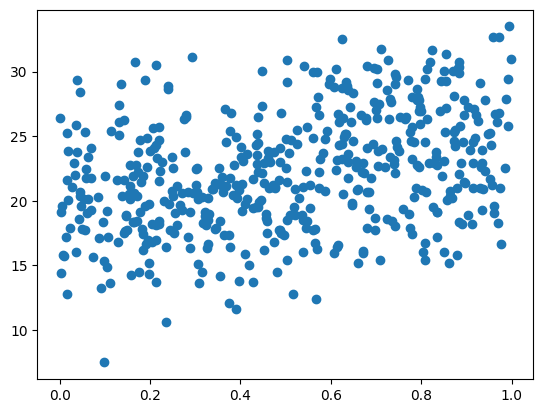

In [147]:
plt.scatter(x[:,2],y_target)

In [132]:


# a = torch.randn(5).unsqueeze(dim=0)
# b = torch.randn(5).unsqueeze(dim=0)
# torch.corrcoef(torch.cat([a,b],dim=0))



tensor([[1.0000, 0.6013],
        [0.6013, 1.0000]])

In [133]:
#torch.corrcoef(torch.cat([x[:,:], y_target],dim=1).T)

tensor([[ 1.0000,  0.0644,  0.0842, -0.0030,  0.0537,  0.5556],
        [ 0.0644,  1.0000, -0.0162, -0.0505, -0.0708,  0.3710],
        [ 0.0842, -0.0162,  1.0000, -0.0486, -0.0015,  0.4100],
        [-0.0030, -0.0505, -0.0486,  1.0000, -0.0035,  0.4083],
        [ 0.0537, -0.0708, -0.0015, -0.0035,  1.0000,  0.3952],
        [ 0.5556,  0.3710,  0.4100,  0.4083,  0.3952,  1.0000]])

In [134]:
#x[:5,]

tensor([[0.2841, 0.9840, 0.2101, 0.7867, 0.0341],
        [0.9323, 0.8525, 0.7649, 0.5311, 0.4015],
        [0.3977, 0.8525, 0.1221, 0.7631, 0.1062],
        [0.1147, 0.1927, 0.6307, 0.1214, 0.3153],
        [0.1904, 0.0591, 0.8195, 0.3497, 0.3735]])

In [150]:
y_target[:5,], bias, error[:5,]

(tensor([[26.4542],
         [22.5214],
         [19.1526],
         [23.1040],
         [25.3546]]),
 tensor([6.]),
 tensor([[ 0.5457],
         [-0.3729],
         [ 0.2508],
         [-0.3550],
         [ 0.9578]]))

In [148]:
torch.dot(weights.squeeze(), x[0,:])

tensor(19.9085)

In [211]:
num_features = 5
num_data_points = 500
x = torch.rand(num_data_points, num_features)
weights = torch.randint(5,10,size=(1,5)).float()
bias = torch.randint(5,10,size=(1,)).float()
error = torch.randn((num_data_points,1))
y_target = bias + x @ weights.T  + error


In [212]:
def torch_cor(tensor_1, tensor_2):
    stacked_tensors = torch.stack([tensor_1, tensor_2], dim=0)  # Stack along the first axis
    return torch.corrcoef(stacked_tensors)[0, 1]  # Extract the correlation coefficient between tensor_1 and tensor_2


from torch.nn import MSELoss
initial_weight = torch.randint(1,5,size=(1,5)).float()
initial_weight.requires_grad = True
initial_bias = torch.randint(5,10,size=(1,)).float()
initial_bias.requires_grad = True
#updated_weight = 
batch_size = 128
mse_loss_function = MSELoss()
lr = 0.001

for i in range(500):
    cur_batch_index = torch.randint(0,x.shape[0],size=(batch_size,))
    cur_batch_x = x[cur_batch_index,:]
    cur_batch_y = y_target[cur_batch_index, ]
    pred_out = cur_batch_x @ initial_weight.T + initial_bias
    cur_loss =  mse_loss_function(pred_out,cur_batch_y)
    print(f"Cur Loss: {cur_loss}")
    cur_loss.backward()
    with torch.no_grad():
        initial_weight -= lr*initial_weight.grad
        initial_bias -= lr*initial_bias.grad
        corr_act_pred = torch_cor(cur_batch_y.squeeze(),pred_out.squeeze())
        print(f"corr coeff: {corr_act_pred}")
        #print(f" weight {initial_weight}")
    initial_weight.grad.zero_()
    initial_bias.grad.zero_()


Cur Loss: 132.33743286132812
corr coeff: 0.8236666917800903
Cur Loss: 134.7568359375
corr coeff: 0.852087676525116
Cur Loss: 112.70610046386719
corr coeff: 0.8758854866027832
Cur Loss: 128.16323852539062
corr coeff: 0.8256852030754089
Cur Loss: 127.74565124511719
corr coeff: 0.8823349475860596
Cur Loss: 131.24998474121094
corr coeff: 0.8662012219429016
Cur Loss: 135.27285766601562
corr coeff: 0.8324275612831116
Cur Loss: 128.3748779296875
corr coeff: 0.8548758625984192
Cur Loss: 119.35284423828125
corr coeff: 0.830115795135498
Cur Loss: 114.97525787353516
corr coeff: 0.8564154505729675
Cur Loss: 117.70502471923828
corr coeff: 0.893711507320404
Cur Loss: 108.45283508300781
corr coeff: 0.8213380575180054
Cur Loss: 103.71825408935547
corr coeff: 0.8330719470977783
Cur Loss: 116.88915252685547
corr coeff: 0.8690130710601807
Cur Loss: 115.58023834228516
corr coeff: 0.8586876392364502
Cur Loss: 120.95484924316406
corr coeff: 0.8809049129486084
Cur Loss: 114.69495391845703
corr coeff: 0.82664

In [213]:
weights, bias

(tensor([[6., 9., 6., 9., 5.]]), tensor([7.]))

In [214]:
initial_weight, initial_bias

(tensor([[3.2268, 5.4143, 3.4804, 4.4839, 6.0500]], requires_grad=True),
 tensor([12.1938], requires_grad=True))

In [237]:
import torch
from torch.nn import MSELoss

# Function to compute correlation coefficient
def torch_cor(tensor_1, tensor_2):
    stacked_tensors = torch.stack([tensor_1, tensor_2], dim=0)
    return torch.corrcoef(stacked_tensors)[0, 1]

# Data generation (as before)
num_features = 5
num_data_points = 500
x = torch.rand(num_data_points, num_features)
weights = torch.randint(5, 10, size=(1, 5)).float()
bias = torch.randint(5, 10, size=(1,)).float()
error = torch.randn((num_data_points, 1))
y_target = bias + x @ weights.T + error

# Standardizing the data
x_mean = x.mean(dim=0, keepdim=True)
x_std = x.std(dim=0, keepdim=True)
x_normalized = (x - x_mean) / x_std

# Initial weight and bias
#initial_weight  = torch.randn(1, num_features).float() * 0.01  # Small random initialization
initial_weight = torch.randint(1,5,size=(1,num_features)).float()
initial_weight.requires_grad = True
initial_bias = torch.zeros(1).float()  # Zero bias initialization
initial_bias.requires_grad = True

# Parameters
batch_size = 128
mse_loss_function = MSELoss()
lr = 0.001
num_epochs = 10000

# Training loop
for epoch in range(num_epochs):
    cur_batch_index = torch.randint(0, x.shape[0], size=(batch_size,))
    cur_batch_x = x_normalized[cur_batch_index, :]  # Use normalized data
    cur_batch_y = y_target[cur_batch_index, ]

    # Forward pass
    pred_out = cur_batch_x @ initial_weight.T + initial_bias
    cur_loss = mse_loss_function(pred_out, cur_batch_y)

    print(f"Epoch {epoch + 1}, Loss: {cur_loss.item()}")

    # Backpropagation
    cur_loss.backward()

    # Update parameters (manual gradient descent)
    with torch.no_grad():
        initial_weight -= lr * initial_weight.grad
        initial_bias -= lr * initial_bias.grad

        # Calculate correlation between actual and predicted
        corr_act_pred = torch_cor(cur_batch_y.squeeze(), pred_out.squeeze())
        print(f"Correlation coefficient: {corr_act_pred}")

    # Zero the gradients after each update
    initial_weight.grad.zero_()
    initial_bias.grad.zero_()


Epoch 1, Loss: 513.4721069335938
Correlation coefficient: 0.9327371716499329
Epoch 2, Loss: 516.3629760742188
Correlation coefficient: 0.936616837978363
Epoch 3, Loss: 486.2093200683594
Correlation coefficient: 0.9273284077644348
Epoch 4, Loss: 494.557861328125
Correlation coefficient: 0.9427456259727478
Epoch 5, Loss: 505.9379577636719
Correlation coefficient: 0.922132670879364
Epoch 6, Loss: 494.0025329589844
Correlation coefficient: 0.9262577295303345
Epoch 7, Loss: 488.3549499511719
Correlation coefficient: 0.9231367111206055
Epoch 8, Loss: 513.379638671875
Correlation coefficient: 0.936943769454956
Epoch 9, Loss: 504.18841552734375
Correlation coefficient: 0.9353214502334595
Epoch 10, Loss: 502.5328063964844
Correlation coefficient: 0.9419353008270264
Epoch 11, Loss: 473.1092529296875
Correlation coefficient: 0.9391494393348694
Epoch 12, Loss: 487.8283386230469
Correlation coefficient: 0.9461542963981628
Epoch 13, Loss: 496.0831298828125
Correlation coefficient: 0.9309499263763428

In [238]:
weights, bias

(tensor([[5., 5., 6., 9., 6.]]), tensor([7.]))

In [239]:
initial_weight, initial_bias

(tensor([[1.4278, 1.4451, 1.8190, 2.4491, 1.7354]], requires_grad=True),
 tensor([22.3319], requires_grad=True))

In [219]:
import statsmodels.api as sm

In [220]:
x_np = x.numpy()
y_target_np = y_target.numpy().squeeze()

# Add a column of ones to X for the intercept (bias)
x_np_with_intercept = sm.add_constant(x_np)

# Fit the OLS model
ols_model = sm.OLS(y_target_np, x_np_with_intercept).fit()

# Print the summary of the regression results
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2034.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:25:47   Log-Likelihood:                -732.30
No. Observations:                 500   AIC:                             1477.
Df Residuals:                     494   BIC:                             1502.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8871      0.181     49.139      0.0

In [241]:
# Re-initializing the necessary imports and variables after code reset
import torch
import statsmodels.api as sm
import pandas as pd

# Set seed for reproducibility
torch.manual_seed(42)

# Data generation
num_features = 5
num_data_points = 500
x = torch.rand(num_data_points, num_features)
true_weights = torch.randint(5, 10, size=(1, num_features)).float()
true_bias = torch.randint(5, 10, size=(1,)).float()
error = torch.randn((num_data_points, 1))
y_target = true_bias + x @ true_weights.T + error

# Convert PyTorch tensors to NumPy arrays for use with statsmodels
x_np = x.numpy()
y_target_np = y_target.numpy().squeeze()

# Add a column of ones to X for the intercept (bias)
x_np_with_intercept = sm.add_constant(x_np)

# Fit the OLS model
ols_model = sm.OLS(y_target_np, x_np_with_intercept).fit()

# Extract the parameter estimates from OLS
ols_weights = ols_model.params[1:]  # Coefficients (weights)
ols_bias = ols_model.params[0]  # Intercept (bias)

# PyTorch Model Training (Simple Linear Regression)
#initial_weight = torch.randn(1, num_features, requires_grad=True)
initial_weight = torch.randint(1,5,size=(1,num_features)).float()
initial_weight.requires_grad = True
initial_bias = torch.randn(1, requires_grad=True)
lr = 0.001
num_epochs = 10000

mse_loss_function = torch.nn.MSELoss()

for epoch in range(num_epochs):
    pred_out = x @ initial_weight.T + initial_bias
    loss = mse_loss_function(pred_out, y_target)
    
    # Backpropagation
    loss.backward()
    
    # Update weights and bias
    with torch.no_grad():
        initial_weight -= lr * initial_weight.grad
        initial_bias -= lr * initial_bias.grad
    
    # Zero the gradients
    initial_weight.grad.zero_()
    initial_bias.grad.zero_()

# Extract PyTorch parameter estimates
pytorch_weights = initial_weight.detach().numpy().squeeze()
pytorch_bias = initial_bias.detach().numpy().squeeze()

# Prepare the table for comparison
data = {
    'True Weights': true_weights.numpy().squeeze(),
    'PyTorch Weights': pytorch_weights,
    'OLS Weights': ols_weights,
}

comparison_df = pd.DataFrame(data)
comparison_df['True Bias'] = true_bias.item()
comparison_df['PyTorch Bias'] = pytorch_bias
comparison_df['OLS Bias'] = ols_bias



In [242]:
comparison_df

,True Weights,PyTorch Weights,OLS Weights,True Bias,PyTorch Bias,OLS Bias
0,8.0,7.531744,7.966930,8.0,8.212252,8.050062
1,5.0,5.620820,5.000308,8.0,8.212252,8.050062
2,6.0,6.118380,6.023226,8.0,8.212252,8.050062
3,7.0,7.106414,7.094142,8.0,8.212252,8.050062
4,9.0,8.208278,8.822104,8.0,8.212252,8.050062


In [243]:
initial_weight

tensor([[7.5317, 5.6208, 6.1184, 7.1064, 8.2083]], requires_grad=True)